# Comprehensive Employee Data Analysis with SQL and R

This project demonstrates advanced integration of SQL and R for data analysis. I created multiple tables in an SQLite database, insert employee and department data, and use complex SQL queries to retrieve and analyze the data in R.

In [12]:
install.packages("DBI")
install.packages("RSQLite")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Connecting to SQLite database

In [13]:
library(DBI)
library(RSQLite)

# Create a connection an SQLite database
con <- dbConnect(RSQLite::SQLite(), "employee_data.db")

## Creating Tables and Inserting Data

Created tables for employees, departments, and salaries, and insert sample data.

In [14]:
# Create tables
dbExecute(con, "CREATE TABLE employees (id INTEGER PRIMARY KEY, name TEXT, department_id INTEGER, hire_date TEXT)")
dbExecute(con, "CREATE TABLE departments (id INTEGER PRIMARY KEY, name TEXT)")
dbExecute(con, "CREATE TABLE salaries (employee_id INTEGER, salary REAL, effective_date TEXT)")

# Insert data into departments
dbExecute(con, "INSERT INTO departments (id, name) VALUES (1, 'HR'), (2, 'Engineering'), (3, 'Sales')")

# Insert data into employees
dbExecute(con, "INSERT INTO employees (id, name, department_id, hire_date) VALUES (1, 'Alice', 2, '2020-01-15'), (2, 'Bob', 1, '2019-03-22'), (3, 'Charlie', 3, '2018-07-30')")

# Insert data into salaries
dbExecute(con, "INSERT INTO salaries (employee_id, salary, effective_date) VALUES (1, 60000, '2021-01-01'), (1, 65000, '2022-01-01'), (2, 50000, '2019-03-22'), (2, 55000, '2020-03-22'), (3, 70000, '2018-07-30')")

[1] 0

[1] 0

[1] 0

[1] 3

[1] 3

[1] 5

## Querying the Data

Used SQL to retrieve detailed employee information and salary data.

In [15]:
# Query to get all employee details with current salary
employee_details <- dbGetQuery(con, "
  SELECT e.id, e.name, d.name AS department, MAX(s.salary) AS current_salary, e.hire_date
  FROM employees e
  JOIN departments d ON e.department_id = d.id
  JOIN salaries s ON e.id = s.employee_id
  GROUP BY e.id, e.name, d.name, e.hire_date
")
print(employee_details)

  id    name  department current_salary  hire_date
1  1   Alice Engineering          65000 2020-01-15
2  2     Bob          HR          55000 2019-03-22
3  3 Charlie       Sales          70000 2018-07-30


## Analyzing and Visualizing Data in R

Performed data analysis and created visualizations.

       id          name            department        current_salary 
 Min.   :1.0   Length:3           Length:3           Min.   :55000  
 1st Qu.:1.5   Class :character   Class :character   1st Qu.:60000  
 Median :2.0   Mode  :character   Mode  :character   Median :65000  
 Mean   :2.0                                         Mean   :63333  
 3rd Qu.:2.5                                         3rd Qu.:67500  
 Max.   :3.0                                         Max.   :70000  
   hire_date         
 Min.   :2018-07-30  
 1st Qu.:2018-11-24  
 Median :2019-03-22  
 Mean   :2019-04-12  
 3rd Qu.:2019-08-18  
 Max.   :2020-01-15  

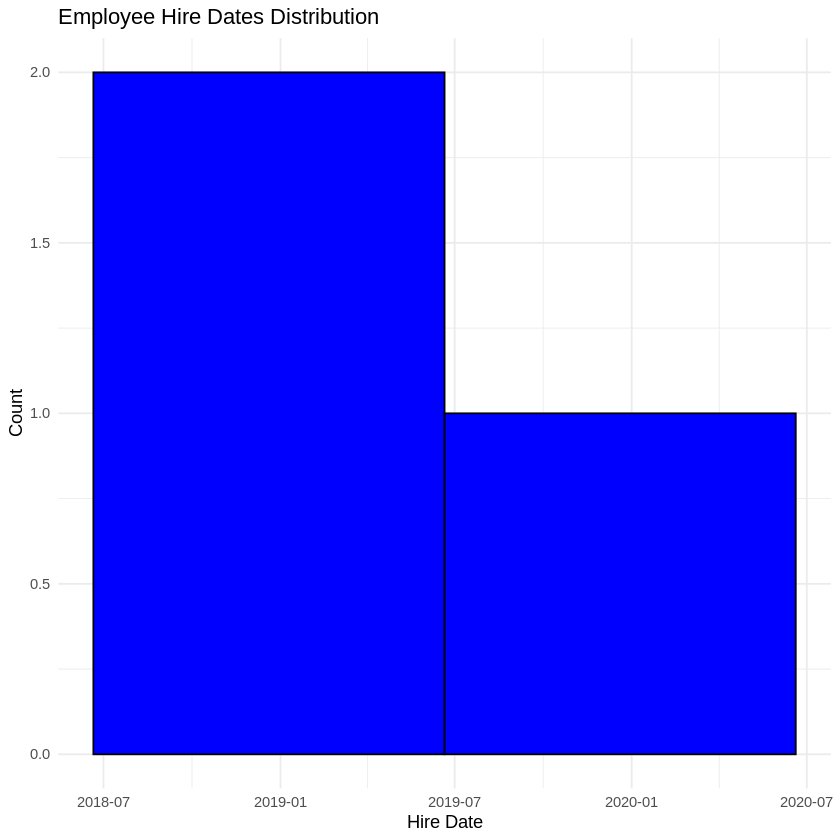

In [16]:
library(dplyr)
library(lubridate)
library(ggplot2)

# Convert hire_date to Date type
employee_details <- employee_details %>%
  mutate(hire_date = as.Date(hire_date))

# Summary statistics
summary(employee_details)

# Hire data distribution
ggplot(employee_details, aes(x = hire_date)) +
  geom_histogram(binwidth = 365, fill = "blue", color = "black") +
    theme_minimal() +
    labs(title = "Employee Hire Dates Distribution", x = "Hire Date", y = "Count")

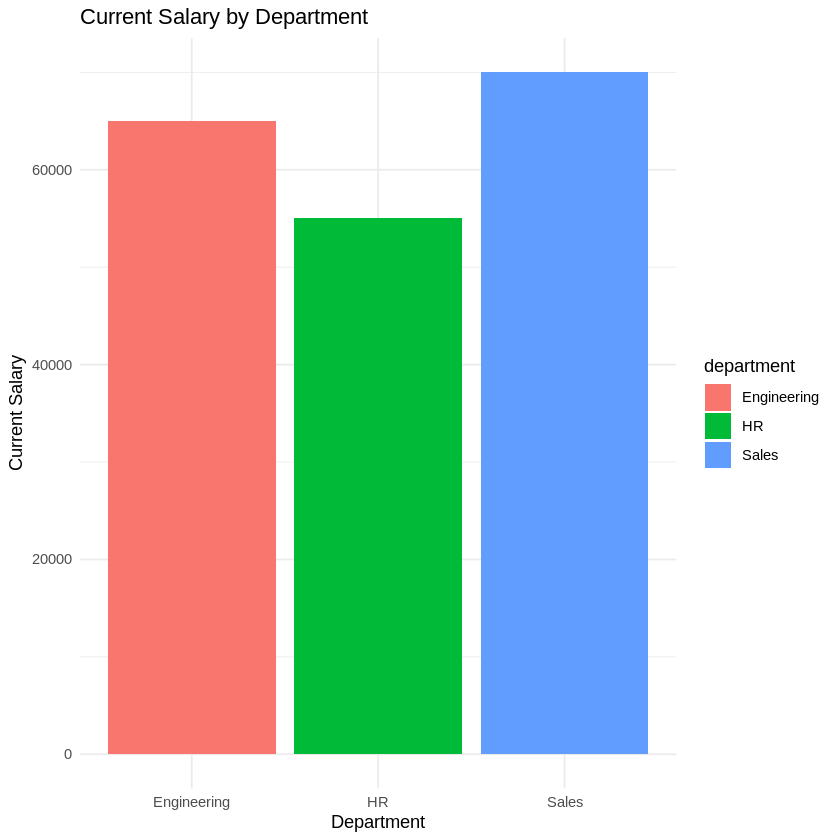

In [17]:
# Bar plot of current salary by department
ggplot(employee_details, aes(x = department, y = current_salary, fill = department)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Current Salary by Department", x = "Department", y = "Current Salary")

## Advanced Queries and Analysis

Executed more complex SQL queries and analyzed the results.

   department avg_salary
1 Engineering      62500
2          HR      52500
3       Sales      70000
     name salary effective_date
1   Alice  60000     2021-01-01
2   Alice  65000     2022-01-01
3     Bob  50000     2019-03-22
4     Bob  55000     2020-03-22
5 Charlie  70000     2018-07-30


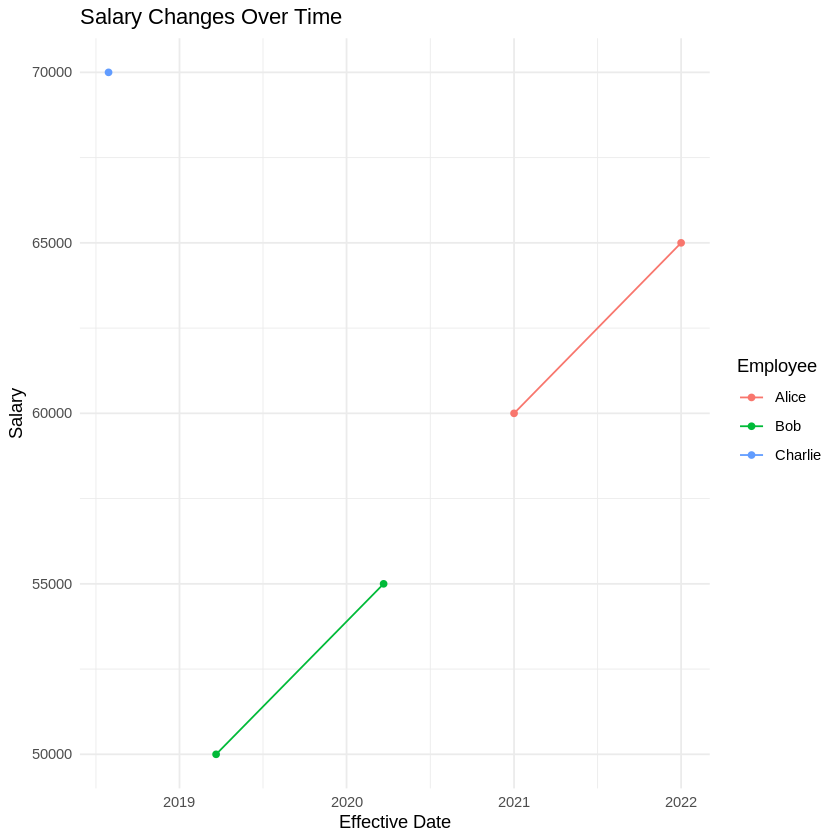

In [18]:
# Average salary by department
avg_salary_by_dept <- dbGetQuery(con, "
  SELECT d.name AS department, AVG(s.salary) AS avg_salary
  FROM departments d
  JOIN employees e ON d.id = e.department_id
  JOIN salaries s ON e.id = s.employee_id
  GROUP BY d.name
")
print(avg_salary_by_dept)

# Employees with salary changes
salary_changes <- dbGetQuery(con, "
  SELECT e.name, s.salary, s.effective_date
  FROM employees e
  JOIN salaries s ON e.id = s.employee_id
  ORDER BY e.name, s.effective_date
")
print(salary_changes)

# Visualization of salary changes over time
salary_changes <- salary_changes %>%
  mutate(effective_date = as.Date(effective_date))

ggplot(salary_changes, aes(x = effective_date, y = salary, color = name)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  labs(title = "Salary Changes Over Time", x = "Effective Date", y = "Salary", color = "Employee")

## Closing the connection

In [19]:
# Close the database connection
dbDisconnect(con)

## Conclusion

The project effectively demonstrates the integration of SQL and R for comprehensive data analysis. By creating a structured SQLite database and performing complex SQL queries, I was able to retrieve and analyze key employee data. The visualizations provided insights into various aspects of the employee data, including:

**Employee Hire Dates Distributions**: The histogram of hire dates revealed the timing of new hires, which can be useful for understanding hiring trends and patterns over the years.

**Current Salary by Department**: The bar plot highlighted the salary distribution across different departments, showing variations in compensation and providing a basis for further compensation analysis.

**Salary Changes Over Time**: The line plot with salary changes over time for each employee illustrated individual salary progression, which is crucial for evaluating employee growth and retention strategies.